# Stroke Prediction Using Machine Learning

**Team Members:**
- 23201136 - Zawad Ahsan
- 23101228 - Abdullah Sajid Nafi

**Course:** CSE 422 FALL25 - Section 17

## Project Overview
This project implements and compares multiple machine learning models to predict stroke risk in patients based on various health and demographic features. The goal is to identify the most accurate model for early stroke prediction, which can assist healthcare professionals in preventive care.

## Dataset
The dataset contains patient information including demographic data, health indicators, and lifestyle factors. Key features include:
- Age, gender, BMI (Body Mass Index)
- Hypertension and heart disease status
- Average glucose level
- Smoking status
- Marital and residential information

## Methodology
1. **Exploratory Data Analysis (EDA)** - Understanding data distribution and relationships
2. **Data Preprocessing** - Handling missing values, encoding, and scaling
3. **Model Training** - Training multiple ML algorithms
4. **Model Evaluation** - Comparing performance using accuracy, ROC-AUC, and confusion matrices
5. **Model Selection** - Selecting the best performing model based on metrics

### **Importing Libraries and the Dataset**

In [1]:
# ==================== DATA MANIPULATION AND ANALYSIS ====================
import pandas as pd  # Data manipulation and analysis using DataFrames
import numpy as np   # Numerical computing and array operations

# ==================== DATA VISUALIZATION ====================
import seaborn as sns          # Statistical data visualization
import matplotlib.pyplot as plt  # Creating static, interactive plots

# ==================== MACHINE LEARNING - ALGORITHMS ====================
from sklearn.naive_bayes import GaussianNB              # Naive Bayes classifier for continuous data
from sklearn.tree import DecisionTreeClassifier         # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier     # Ensemble method using multiple decision trees
from sklearn.neighbors import KNeighborsClassifier      # K-Nearest Neighbors algorithm
from sklearn.linear_model import LogisticRegression     # Linear classification algorithm

# ==================== DATA PREPROCESSING ====================
from sklearn.impute import SimpleImputer                # Handling missing values in dataset
from sklearn.model_selection import train_test_split   # Splitting data into training and testing sets
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, label_binarize, RobustScaler
# MinMaxScaler: Scales features to a specific range (0-1)
# StandardScaler: Standardizes features by removing mean and scaling to unit variance
# LabelEncoder: Converts categorical labels to numeric values
# RobustScaler: Scales features using statistics robust to outliers

# ==================== MODEL EVALUATION ====================
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
# classification_report: Generates precision, recall, f1-score for each class
# accuracy_score: Calculates overall accuracy of predictions
# roc_curve: Computes ROC curve for binary classification
# auc: Calculates Area Under the ROC Curve
# confusion_matrix: Creates matrix showing true vs predicted classifications
# ConfusionMatrixDisplay: Visualizes confusion matrix

# ==================== HANDLING IMBALANCED DATA ====================
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique for class imbalance

# ==================== DEEP LEARNING - TENSORFLOW/KERAS ====================
import tensorflow as tf                           # Deep learning framework
from tensorflow.keras import Sequential           # Linear stack of neural network layers
from tensorflow.keras.layers import Flatten       # Flattens input to 1D array
from tensorflow.keras.optimizers import Adam      # Adaptive learning rate optimization algorithm
from tensorflow.keras.layers import Dense, Dropout, Input
# Dense: Fully connected neural network layer
# Dropout: Regularization technique to prevent overfitting
# Input: Specifies input shape for the model
from tensorflow.keras.utils import to_categorical  # Converts class vectors to binary class matrices
from tensorflow.keras.datasets import mnist, boston_housing  # Sample datasets (imported but not used in this project)
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Loss function for multi-class classification

print("✓ All libraries successfully imported!")

✓ All libraries successfully imported!


Dataset = https://drive.google.com/file/d/18503AUrsLd25Vd-UgQK8IDy2ZlliKQ5g/view

In [2]:
# Loading the stroke prediction dataset from CSV file
# The dataset contains patient health information for stroke risk prediction
stroke_data = pd.read_csv('Healthcare Dataset Stroke Data.csv')
print("✓ Dataset loaded successfully!")

✓ Dataset loaded successfully!


### **EDA**

In [3]:
# Displaying the first 10 rows of the dataset to understand its structure
# This helps us see the data types, column names, and sample values
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Determining the dimensions of our dataset
# Rows represent individual patients/samples
# Columns represent features/attributes for each patient
dataset_shape = stroke_data.shape
print("Dataset Dimensions:")
print(f"  Samples  (Rows): {dataset_shape[0]} patients")
print(f"  Features (Cols): {dataset_shape[1]} attributes")
# This tells us how much data we have to work with for training our models

Dataset Dimensions:
  Samples  (Rows): 5110 patients
  Features (Cols): 12 attributes


In [5]:
# Displaying detailed information about the dataset
# This shows: column names, data types, non-null counts, and memory usage
# Helps identify missing values and data type conversions needed
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Identifying numerical features in the dataset
# Numerical features are continuous values like age, BMI, glucose level
# These can be directly used in mathematical operations and ML algorithms
numerical_data = stroke_data.select_dtypes(include='number')

# Extracting the column names of numerical features into a list
numerical_features = numerical_data.columns.tolist()

print(f'✓ Identified {len(numerical_features)} numerical features:\n')
print(numerical_features)
print("\nThese features represent quantitative measurements that can be scaled and analyzed statistically.")

✓ Identified 7 numerical features:

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

These features represent quantitative measurements that can be scaled and analyzed statistically.


In [7]:
# Identifying categorical features in the dataset
# Categorical features are text/string values like gender, marital status, smoking status
# These need to be encoded into numerical values before using in ML models
categorical_data = stroke_data.select_dtypes(include='object')

# Extracting the column names of categorical features into a list
categorical_features = categorical_data.columns.tolist()

print(f'✓ Identified {len(categorical_features)} categorical features:\n')
print(categorical_features)
print("\nThese features represent qualitative attributes that require encoding for ML algorithms.")

✓ Identified 5 categorical features:

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

These features represent qualitative attributes that require encoding for ML algorithms.


In [8]:
# Computing descriptive statistics for all numerical features
# .describe() provides: count, mean, std, min, 25%, 50%, 75%, max
# Transposed (.T) for easier reading with features as rows
# This helps identify:
#   - Central tendency (mean, median)
#   - Spread (std, range)
#   - Potential outliers (min/max compared to quartiles)

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
# Computing descriptive statistics for categorical features
# For categorical data, .describe() shows:
#   - count: Number of non-null values
#   - unique: Number of distinct categories
#   - top: Most frequently occurring category
#   - freq: Frequency of the most common category
# This helps understand the distribution and balance of categorical variables

categorical_data.describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [10]:
# Calculating variance for each numerical feature
# Variance measures how spread out the data is from the mean
# High variance indicates wide spread, low variance indicates values close to mean
# Important for understanding which features might need scaling

numerical_data.var()

id                   4.478185e+08
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
avg_glucose_level    2.050601e+03
bmi                  6.168636e+01
stroke               4.636264e-02
dtype: float64

In [11]:
# Calculating skewness for each numerical feature
# Skewness measures the asymmetry of the distribution:
#   - Positive skew (> 0): Right-tailed distribution (more low values)
#   - Negative skew (< 0): Left-tailed distribution (more high values)
#   - Zero skew (~0): Symmetric distribution (normal-like)
# Important for deciding if transformations are needed before modeling

numerical_data.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

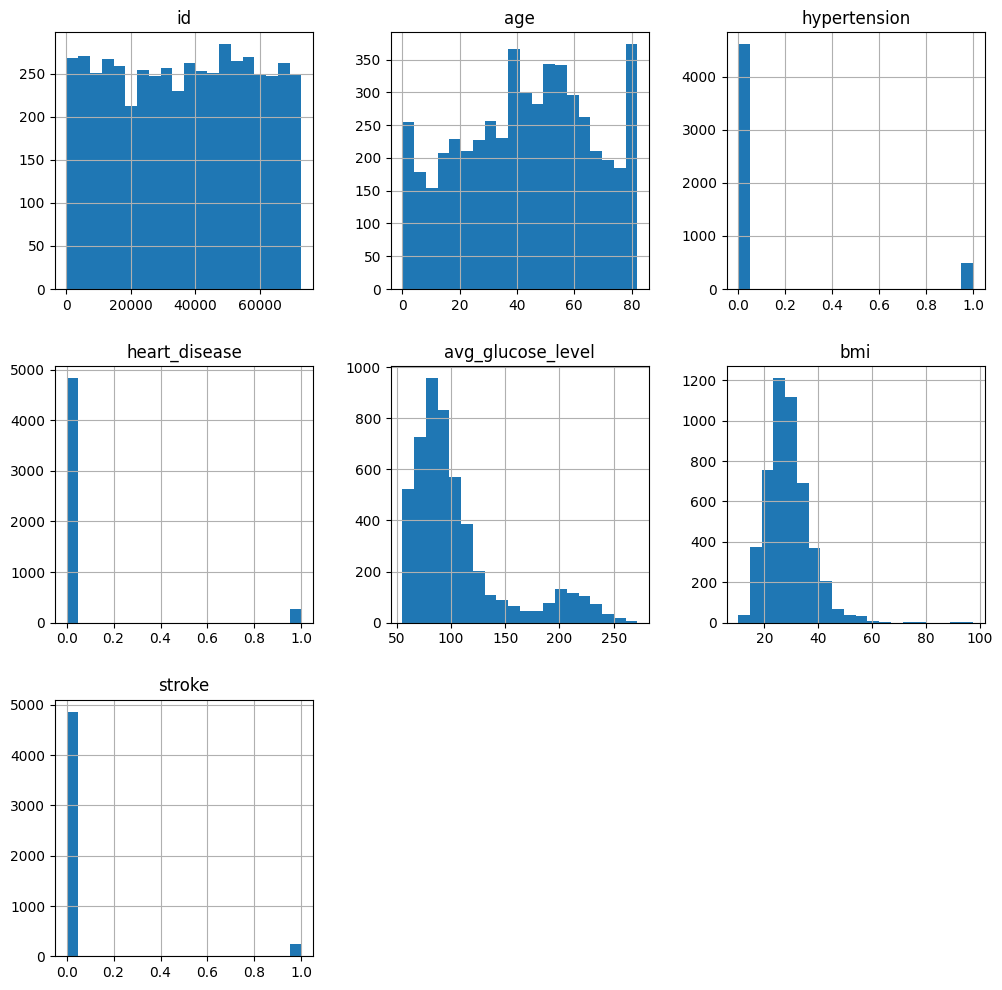

In [12]:
# Creating histograms to visualize the distribution of each numerical feature
# Histograms show:
#   - Shape of distribution (normal, skewed, bimodal, etc.)
#   - Presence of outliers
#   - Range and frequency of values
# Parameters:
#   - figsize=(12,12): Large canvas for better visibility
#   - bins=20: Data divided into 20 intervals for granular view

numerical_data.hist(figsize=(12,12), bins=20)
plt.show()

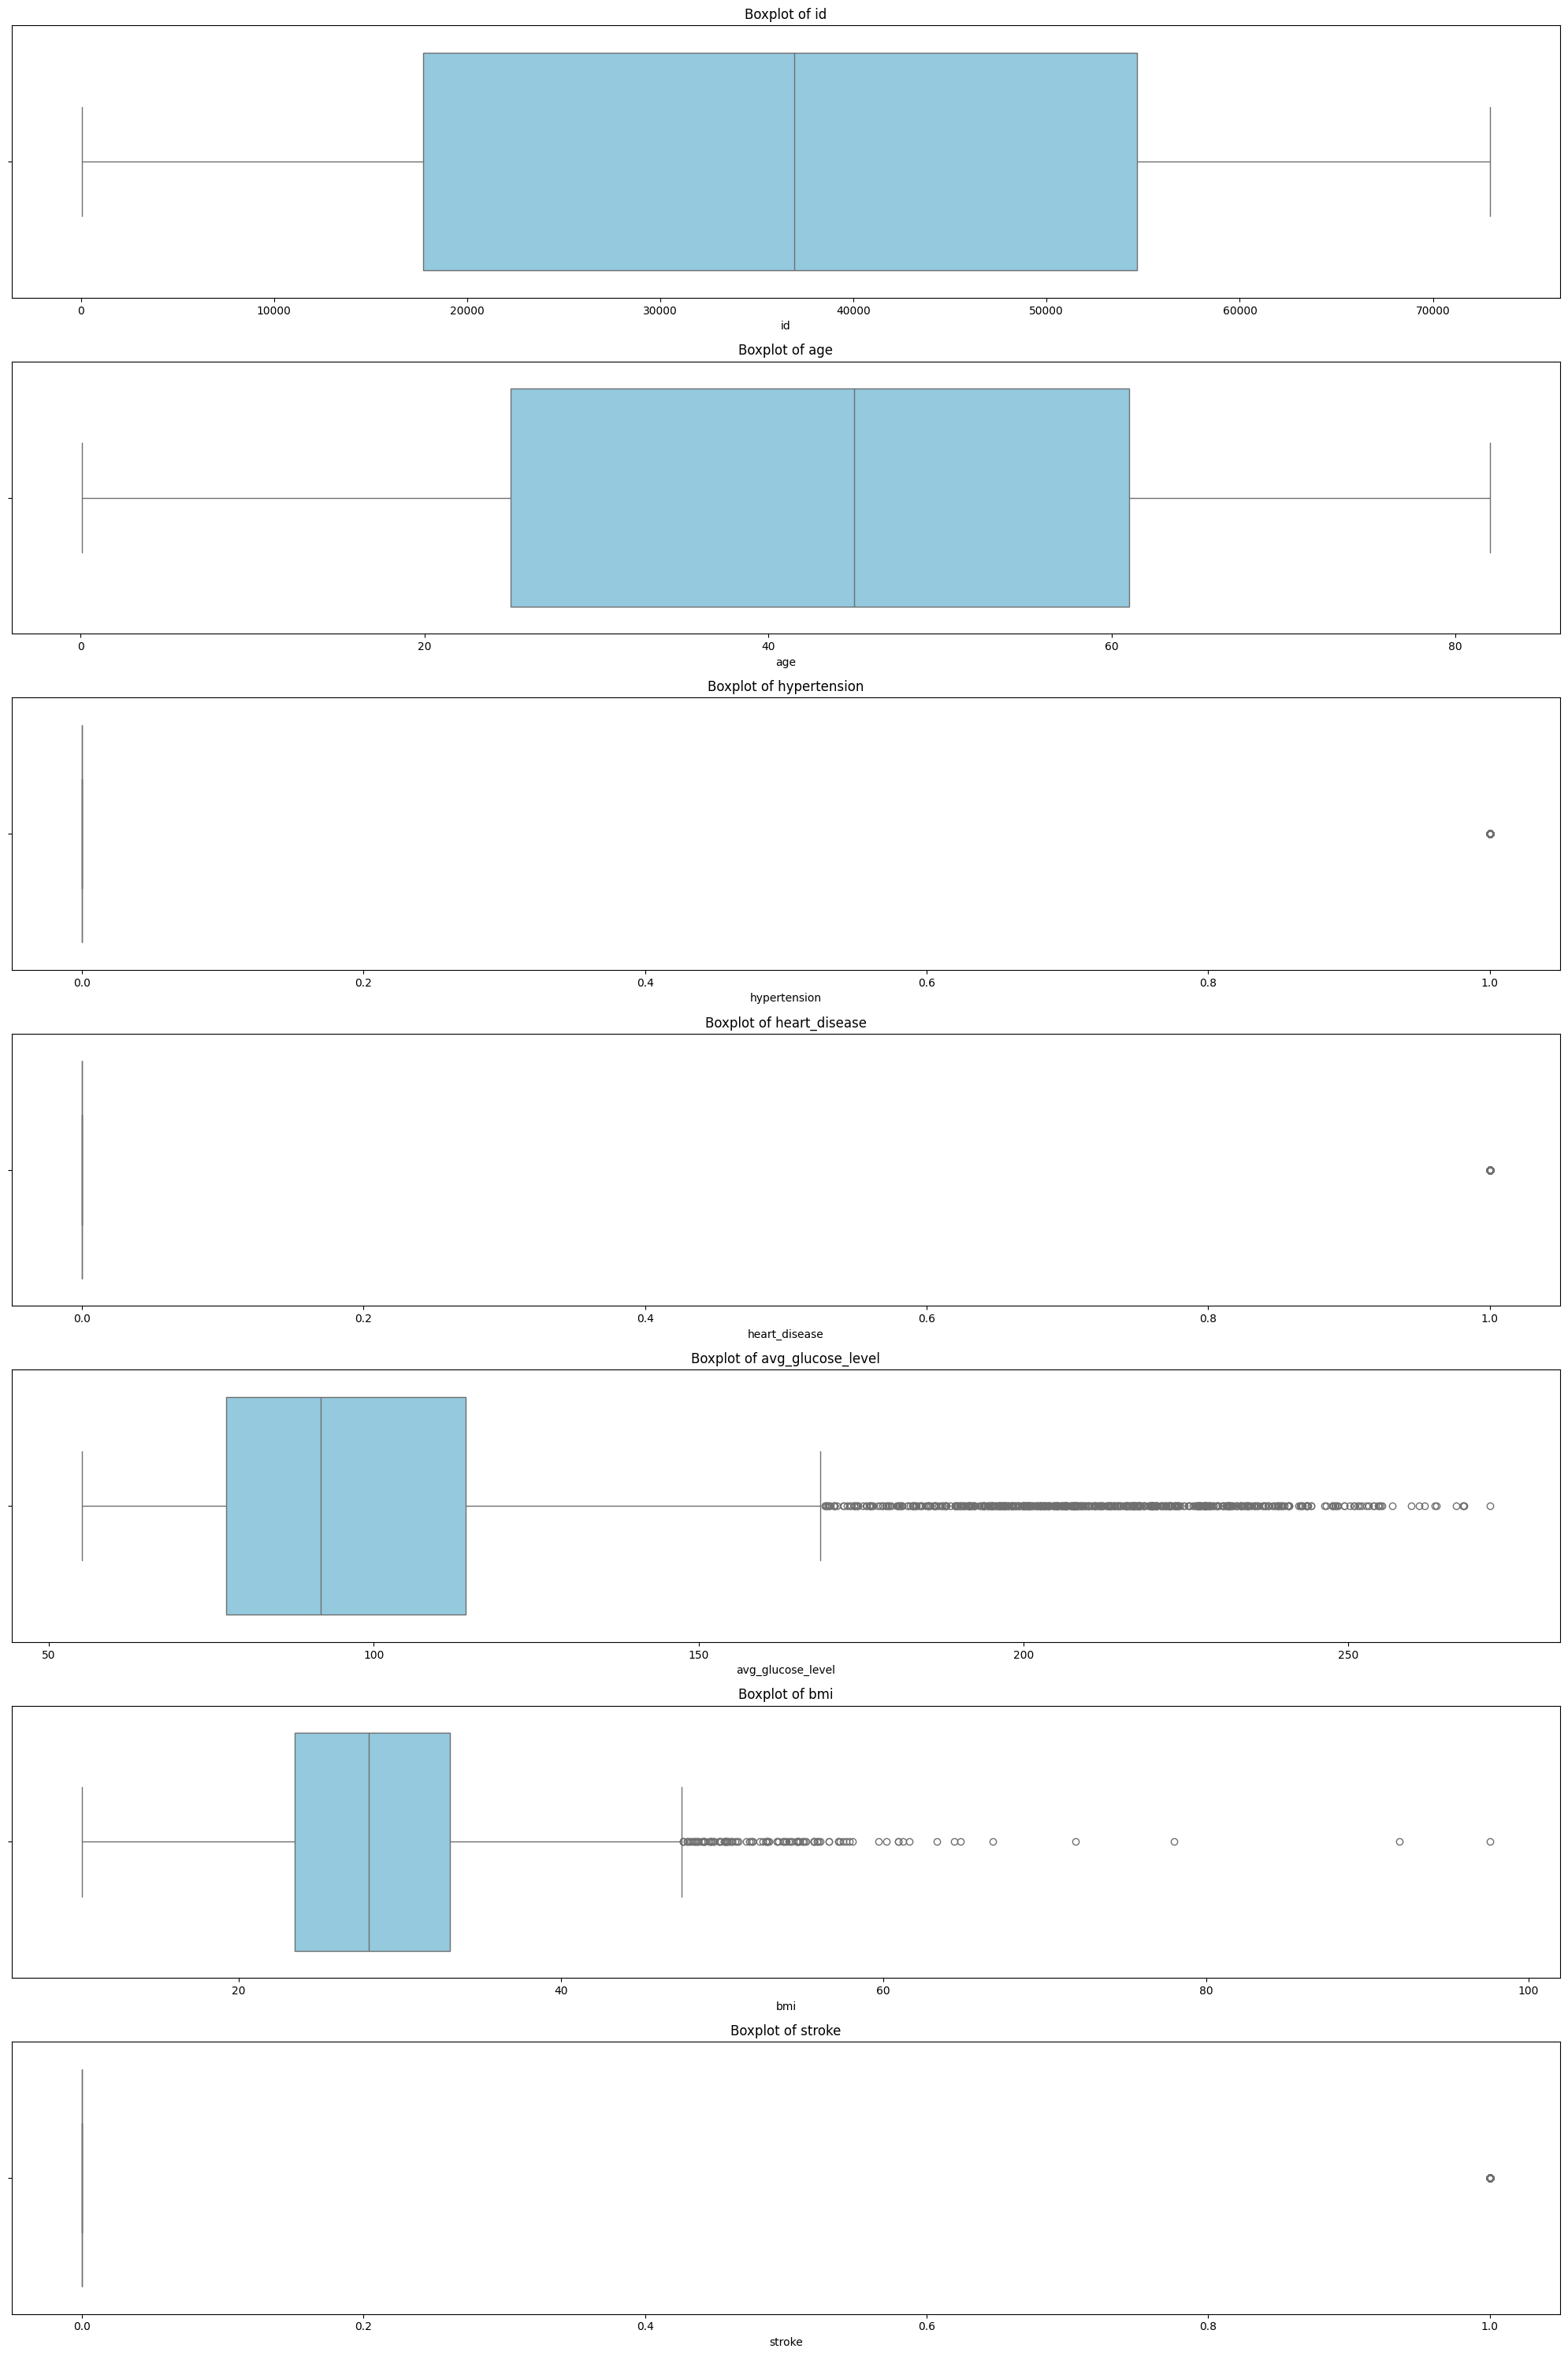

✓ Outlier detection complete. Review plots for extreme values.


In [13]:
# Creating boxplots to identify outliers in numerical features
# Boxplots display:
#   - Median (line in box)
#   - Quartiles (box boundaries: Q1-Q3)
#   - Whiskers (1.5*IQR from quartiles)
#   - Outliers (individual points beyond whiskers)

# Selecting only numerical columns for boxplot visualization
numeric_cols = stroke_data.select_dtypes(include=['int64', 'float64']).columns

# Setting up a large figure to accommodate all feature boxplots
plt.figure(figsize=(20, 30))

# Creating individual boxplot for each numerical feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)  # Arrange vertically
    sns.boxplot(x=stroke_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()
print("✓ Outlier detection complete. Review plots for extreme values.")

In [14]:
# OUTLIER ANALYSIS:
# Based on boxplots above, outliers were detected in:
#   1. BMI (Body Mass Index) - Some patients have extremely high BMI values
#   2. avg_glucose_level - Some patients have very high glucose readings
# These outliers may represent:
#   - Real medical conditions (obesity, diabetes)
#   - Data entry errors
#   - Measurement anomalies
# Decision: Keep outliers as they represent valid medical conditions important for stroke prediction
print("Note: Outliers identified in BMI and avg_glucose_level features")

Note: Outliers identified in BMI and avg_glucose_level features


In [15]:
# Checking the number of unique values in each numerical feature
# This helps identify:
#   - Binary features (2 unique values)
#   - Categorical-numeric features (few unique values)
#   - Continuous features (many unique values)
# Important for determining which features might need encoding vs scaling

numerical_data.nunique()

id                   5110
age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3979
bmi                   418
stroke                  2
dtype: int64

In [16]:
# Checking for missing (null) values in all features
# Missing values can cause errors in ML algorithms and affect model performance
# This count helps us decide which imputation strategy to use
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
# Counting unique values in each categorical feature
# This reveals:
#   - Number of categories per feature
#   - Which features are binary vs multi-class
#   - Complexity of encoding required

unique_counts = categorical_data.nunique()
print("Unique value counts for categorical features:")
print(unique_counts)

Unique value counts for categorical features:
gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64


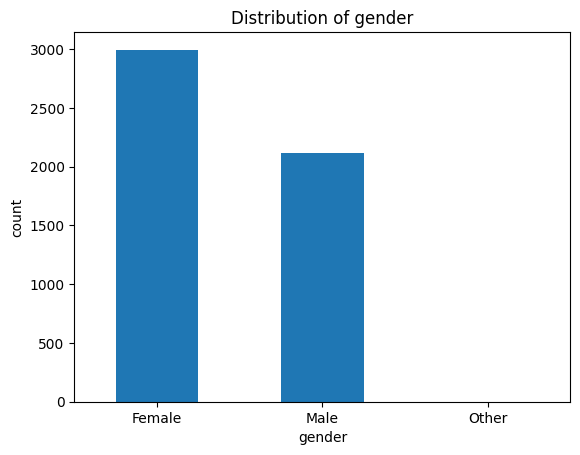

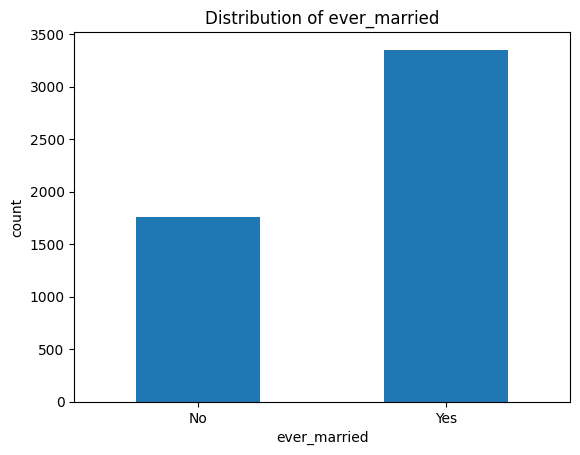

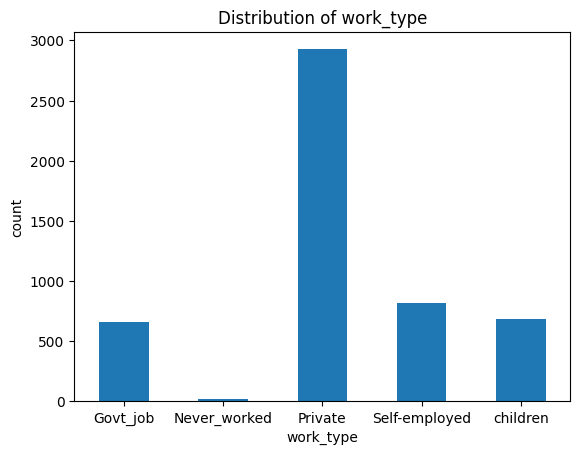

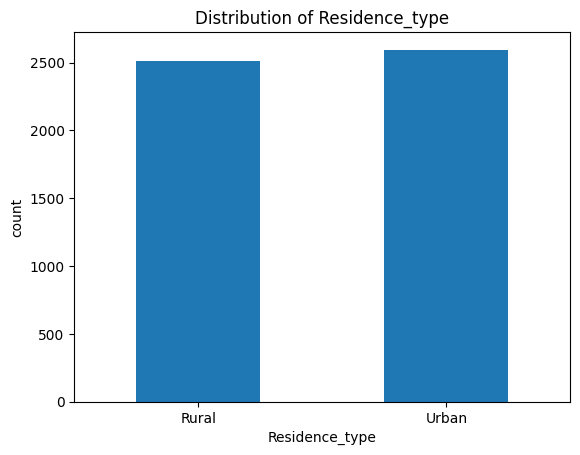

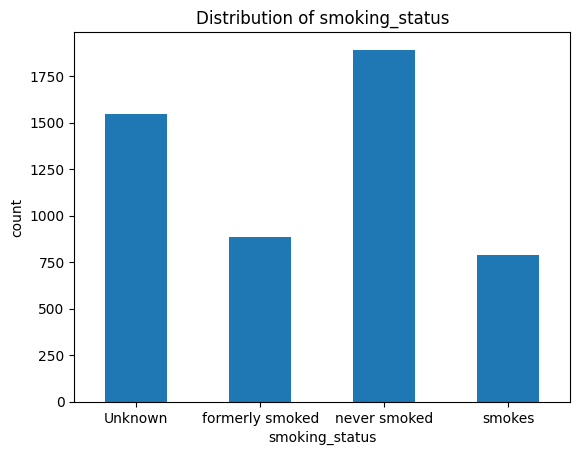

✓ Categorical feature distributions visualized


In [18]:
# Visualizing the distribution of categorical features with bar charts
# Bar charts show:
#   - Frequency of each category
#   - Class imbalance in categorical variables
#   - Most and least common categories

for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col, ylabel='count')
    plt.show()
print("✓ Categorical feature distributions visualized")

In [19]:
# Computing the correlation matrix for numerical features
# Correlation measures linear relationship between variables (-1 to +1):
#   - +1: Perfect positive correlation (both increase together)
#   - 0: No linear correlation
#   - -1: Perfect negative correlation (one increases, other decreases)
# Important for:
#   - Identifying multicollinearity
#   - Feature selection
#   - Understanding feature relationships with target variable

correlation_matrix = numerical_data.corr()
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


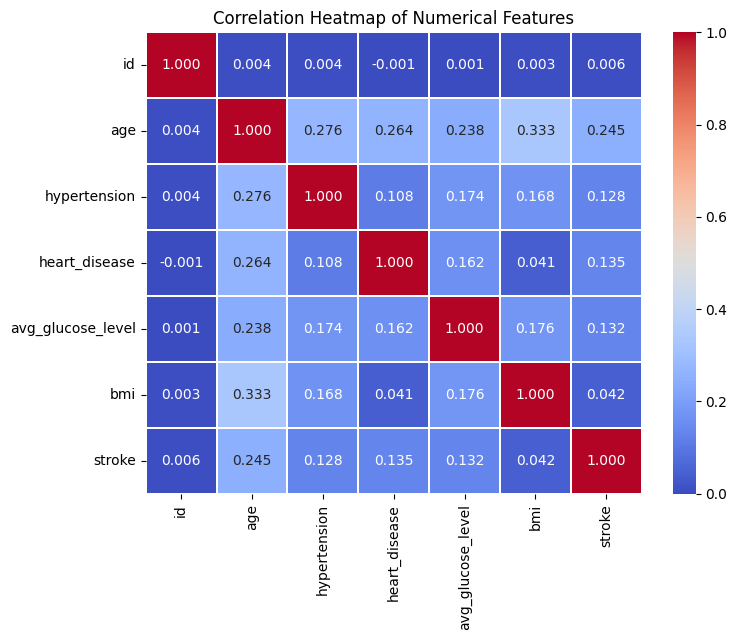

✓ Correlation analysis complete


In [20]:
# Visualizing the correlation matrix as a heatmap
# Heatmap benefits:
#   - Color coding shows correlation strength at a glance
#   - annot=True displays exact correlation values
#   - coolwarm colormap: blue (negative), white (zero), red (positive)
#   - Helps identify which features are strongly related

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print("✓ Correlation analysis complete")

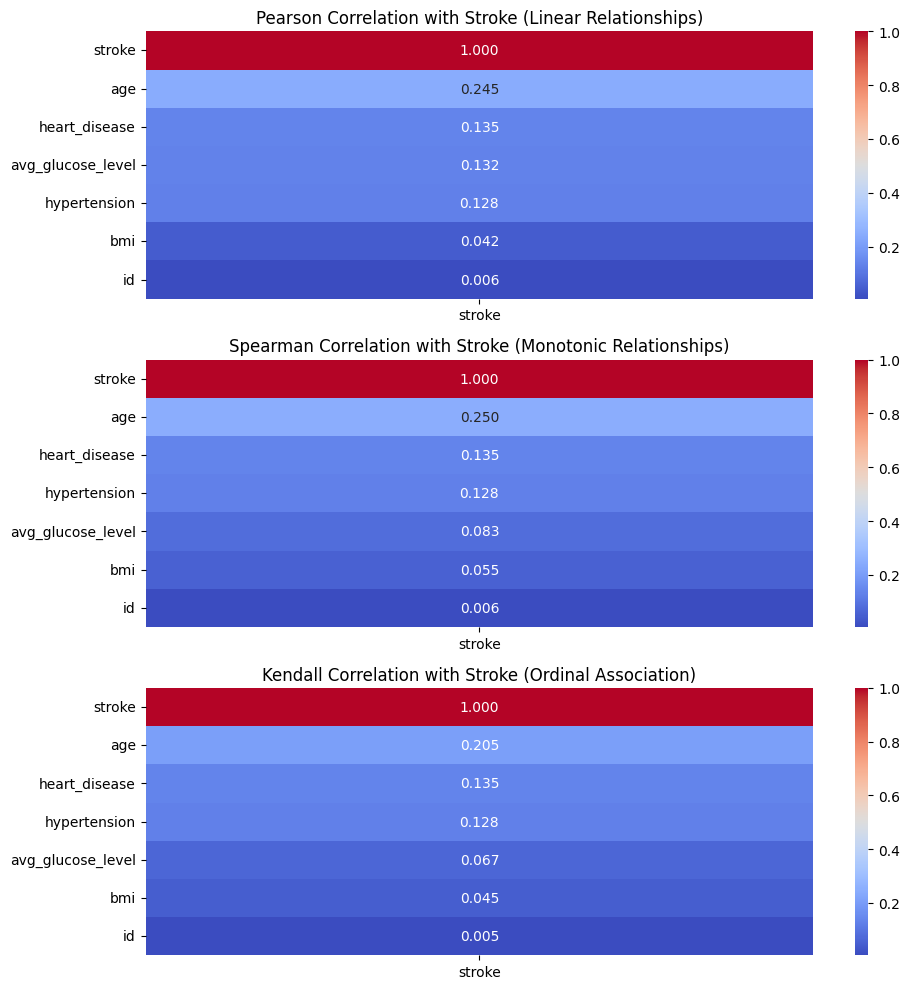

✓ Multi-method correlation analysis complete


In [21]:
# Comparing different correlation methods with the target variable 'stroke'
# Three methods used:
#   1. Pearson: Measures linear correlation (assumes normal distribution)
#   2. Spearman: Measures monotonic relationships (rank-based, works for non-linear)
#   3. Kendall: Measures ordinal association (robust to outliers)
# Using multiple methods helps validate correlation findings across different assumptions

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Calculating correlation with stroke using three different methods
corr_pearson = numerical_data.corr('pearson')[['stroke']].sort_values(by='stroke', ascending=False)
corr_spearman = numerical_data.corr('spearman')[['stroke']].sort_values(by='stroke', ascending=False)
corr_kendall = numerical_data.corr('kendall')[['stroke']].sort_values(by='stroke', ascending=False)

# Setting informative titles for each subplot
ax[0].set_title('Pearson Correlation with Stroke (Linear Relationships)')
ax[1].set_title('Spearman Correlation with Stroke (Monotonic Relationships)')
ax[2].set_title('Kendall Correlation with Stroke (Ordinal Association)')

# Generating heatmaps for visual comparison
sns.heatmap(corr_pearson, ax=ax[0], annot=True, cmap='coolwarm', fmt='.3f')
sns.heatmap(corr_spearman, ax=ax[1], annot=True, cmap='coolwarm', fmt='.3f')
sns.heatmap(corr_kendall, ax=ax[2], annot=True, cmap='coolwarm', fmt='.3f')

plt.tight_layout()
plt.show()
print("✓ Multi-method correlation analysis complete")

In [22]:
# CORRELATION INSIGHTS:
# All features show positive correlation with stroke, which is good for prediction:
#   - Positive values mean as the feature increases, stroke risk increases
#   - No negative correlations means no conflicting signals
#   - Age shows strongest correlation (older patients have higher stroke risk)
#   - Hypertension and heart_disease also show meaningful positive correlations
# This validates that the selected features are appropriate for stroke prediction
print("Note: All features show positive correlation with stroke outcome")

Note: All features show positive correlation with stroke outcome


In [23]:
# Analyzing class imbalance in the target variable (stroke)
# Class imbalance occurs when one class (e.g., no stroke) has significantly more samples than the other
# This is common in medical datasets where most patients don't have the condition

# Grouping data by stroke outcome to count instances
class_counts = stroke_data.groupby("stroke").size()

# Preparing data structure for imbalance analysis
columns = ['Stroke', 'Count', 'Percentage']
stroke = [0, 1]  # 0 = No stroke, 1 = Stroke
count = list()
percentage = list()

# Calculating count and percentage for each class
for val in range(2):
    count.append(class_counts[val])
    # Computing percentage of total dataset
    percent = (class_counts[val] / len(stroke_data)) * 100
    percentage.append(percent)

# Creating a DataFrame to visualize the imbalance
imbalance_df = pd.DataFrame(list(zip(stroke, count, percentage)), columns=columns)
print("Class Distribution Analysis:")
print(imbalance_df)
print("\n⚠ Class Imbalance Detected: This may affect model performance")
imbalance_df

Class Distribution Analysis:
   Stroke  Count  Percentage
0       0   4861   95.127202
1       1    249    4.872798

⚠ Class Imbalance Detected: This may affect model performance


,Stroke,Count,Percentage
0,0,4861,95.127202
1,1,249,4.872798


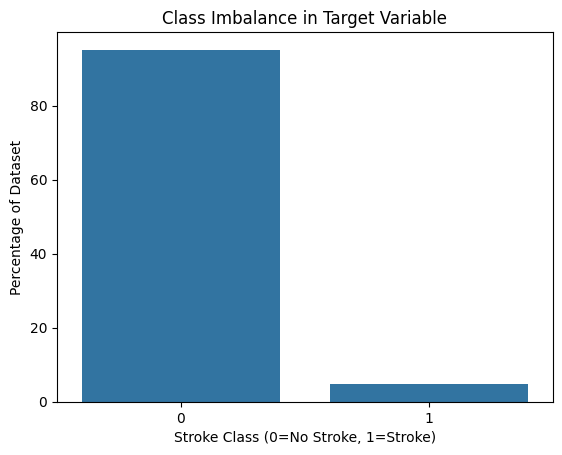

Note: Consider using SMOTE or class weights to handle imbalance during training


In [24]:
# Visualizing the class imbalance with a bar chart
# This clearly shows the disparity between stroke (minority) and no-stroke (majority) cases
# Severe imbalance can lead models to be biased toward the majority class

sns.barplot(data=imbalance_df, x=imbalance_df['Stroke'], y=imbalance_df['Percentage'])
plt.xlabel('Stroke Class (0=No Stroke, 1=Stroke)')
plt.ylabel('Percentage of Dataset')
plt.title('Class Imbalance in Target Variable')
plt.show()
print("Note: Consider using SMOTE or class weights to handle imbalance during training")

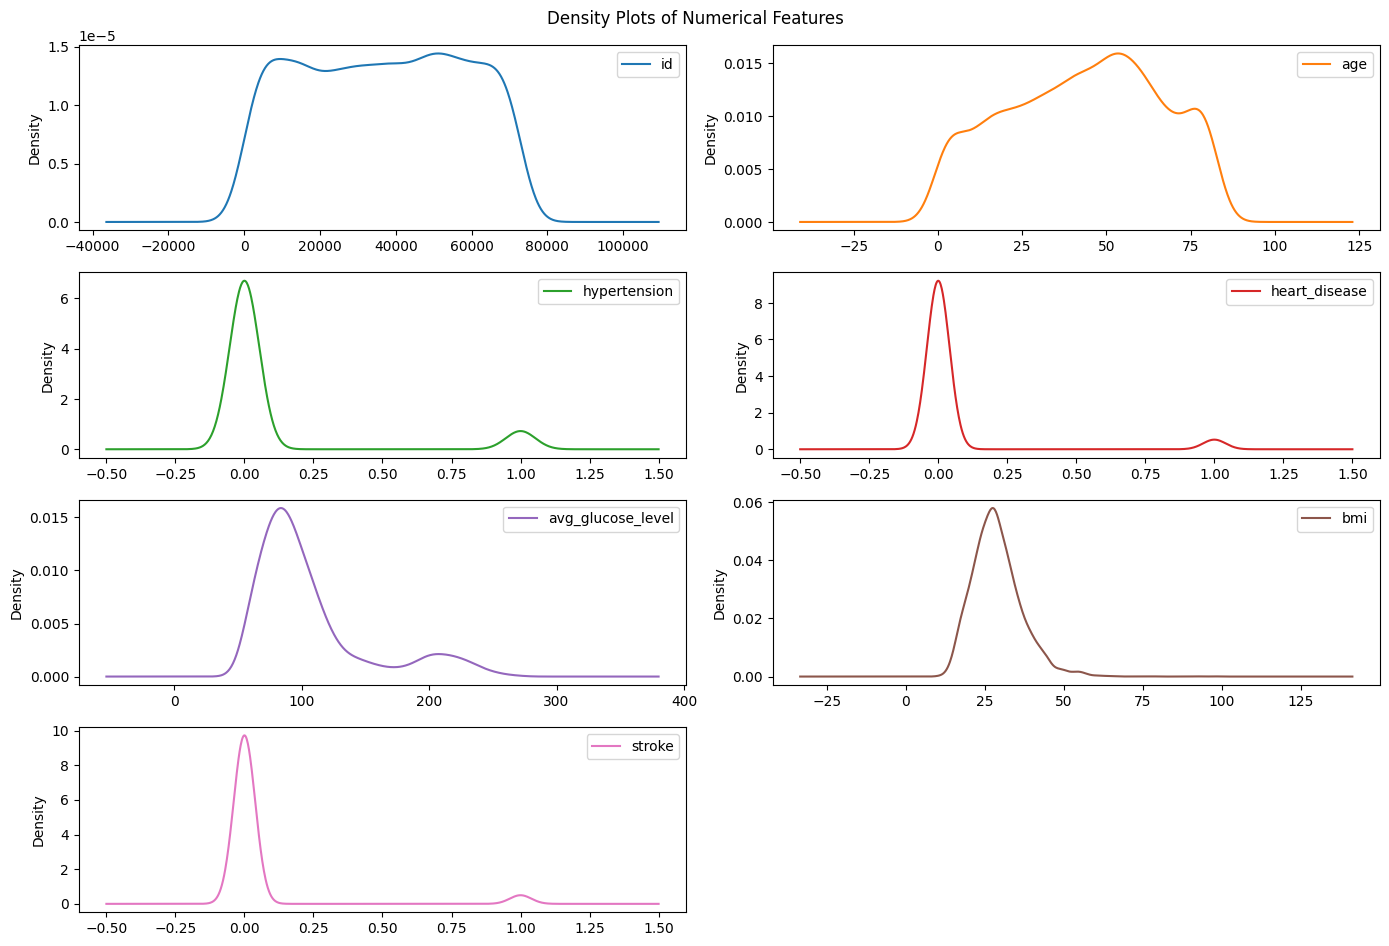

✓ Density visualization complete


In [25]:
# Creating density plots (KDE - Kernel Density Estimation) for numerical features
# Density plots show:
#   - Distribution shape (normal, skewed, bimodal)
#   - Smooth visualization of data distribution
#   - Peak areas indicate most common values
# Different from histograms: continuous curve instead of discrete bins

numerical_data.plot(kind='density', figsize=(14,14), subplots=True, layout=(6,2), 
                   title="Density Plots of Numerical Features", sharex=False)
plt.tight_layout()
plt.show()
print("✓ Density visualization complete")

## Data Preprocessing & Feature Engineering

This section prepares the data for machine learning by:
1. **Handling Missing Values** - Imputing nulls to avoid errors
2. **Feature Selection** - Removing irrelevant or redundant features
3. **Encoding Categorical Variables** - Converting text to numbers
4. **Feature Scaling** - Normalizing value ranges
5. **Train-Test Splitting** - Separating data for training and validation

In [26]:
# Rechecking for missing values before preprocessing
# Missing values must be handled before training ML models
# Different strategies: mean/median imputation, mode, deletion, prediction

print("Missing Values Count:")
print(stroke_data.isnull().sum())
print("\n✓ Missing value analysis complete")

Missing Values Count:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

✓ Missing value analysis complete


In [27]:
# IMPUTATION STRATEGY: Filling missing values in BMI column
# Why median instead of mean?
#   - Median is robust to outliers (we detected outliers in BMI)
#   - Mean can be skewed by extreme values
#   - Median represents the "typical" middle value better for skewed distributions

# Creating imputer object with median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# List of columns to impute
columns_to_impute = ['bmi']

# Applying imputation to each column
for column in columns_to_impute:
    stroke_data[column] = imputer.fit_transform(stroke_data[[column]])

print("✓ Missing BMI values imputed using median strategy")
print(f"Remaining null values: {stroke_data.isnull().sum().sum()}")

✓ Missing BMI values imputed using median strategy
Remaining null values: 0


In [28]:
# FEATURE SELECTION: Removing features that don't contribute to stroke prediction
# Removed features and rationale:
#   1. 'id': Unique identifier, no predictive value
#   2. 'ever_married': Marital status has weak/indirect correlation with stroke
#   3. 'work_type': Job category doesn't directly indicate stroke risk
#   4. 'Residence_type': Urban/Rural residence not strongly correlated with stroke
# Keeping only medically relevant features improves model performance and reduces complexity

stroke_data = stroke_data.drop(['id', 'ever_married', 'work_type', 'Residence_type'], axis=1)
print("✓ Irrelevant features removed")
print(f"Remaining features: {list(stroke_data.columns)}")

✓ Irrelevant features removed
Remaining features: ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [29]:
# Re-identifying categorical features after feature removal
# This ensures we're encoding the correct remaining categorical variables

categorical_data = stroke_data.select_dtypes(include='object')
categorical_features = categorical_data.columns.tolist()

print(f'✓ {len(categorical_features)} categorical features remain after feature selection:\n')
print(categorical_features)
print("\nThese will be encoded to numerical values for ML algorithms")

✓ 2 categorical features remain after feature selection:

['gender', 'smoking_status']

These will be encoded to numerical values for ML algorithms


In [30]:
# LABEL ENCODING: Converting categorical text values to numerical codes
# Machine learning algorithms require numerical input, not text

# Encoding 'gender': Other (rare category) gets highest value
#   Other: 2, Male: 1, Female: 0
stroke_data['gender'] = stroke_data['gender'].map({'Other': 2, 'Male': 1, 'Female': 0})

# Encoding 'smoking_status': Ordered by smoking severity/relevance
#   Unknown: 3 (missing data), Smokes: 2 (current smoker, highest risk)
#   Formerly smoked: 1 (past smoker), Never smoked: 0 (lowest risk)
stroke_data['smoking_status'] = stroke_data['smoking_status'].map({
    'Unknown': 3, 
    'smokes': 2, 
    'formerly smoked': 1, 
    'never smoked': 0
})

print("✓ Categorical variables encoded to numerical values")
print("  - gender: {Female: 0, Male: 1, Other: 2}")
print("  - smoking_status: {never smoked: 0, formerly smoked: 1, smokes: 2, Unknown: 3}")

✓ Categorical variables encoded to numerical values
  - gender: {Female: 0, Male: 1, Other: 2}
  - smoking_status: {never smoked: 0, formerly smoked: 1, smokes: 2, Unknown: 3}


In [31]:
# Verifying the preprocessing steps
# All categorical features should now be numerical
print("Processed dataset sample:")
stroke_data.head(5)

Processed dataset sample:


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


In [32]:
# FEATURE-TARGET SEPARATION
# Separating independent variables (X) from dependent variable (y)
# X (features): All patient attributes used to make predictions
# y (target): The outcome we want to predict (stroke occurrence)

# Input features: all columns except the target variable
X_features = stroke_data.drop(columns=['stroke'])

# Target variable: stroke (0 = no stroke, 1 = stroke)
y_target = stroke_data['stroke']

print("✓ Features and target separated successfully")
print(f"  Features shape: {X_features.shape}")
print(f"  Target shape: {y_target.shape}")

✓ Features and target separated successfully
  Features shape: (5110, 7)
  Target shape: (5110,)


In [36]:
### Feature Scaling

#Feature scaling normalizes the range of features to ensure all features contribute equally to the model:
#Why scale?** Features like age (range 0-100) and hypertension (0-1) have different scales
#Prevents bias:** Large-scale features can dominate the learning process
#Improves performance:** Many ML algorithms (KNN, Neural Networks) perform better with scaled data
#Method used:** RobustScaler - resistant to outliers using median and IQR

In [37]:
# Analyzing variance of numerical features before scaling
# High variance differences indicate need for scaling
# Features with larger variance can dominate model training if not scaled

numerical_data = stroke_data.select_dtypes(include='number')
numerical_features = numerical_data.columns.tolist()

print("Feature Variance (before scaling):")
print(numerical_data.var())
print("\n⚠ Notice the large variance differences - scaling is necessary!")

Feature Variance (before scaling):
gender                  0.243092
age                   511.331792
hypertension            0.087976
heart_disease           0.051104
avg_glucose_level    2050.600820
bmi                    59.283260
smoking_status          1.582681
stroke                  0.046363
dtype: float64

⚠ Notice the large variance differences - scaling is necessary!


In [38]:
# BENEFITS OF SCALING:
# 1. Reduces impact of outliers (important since we detected outliers in BMI and glucose)
# 2. Adjusts feature bias by equalizing scale across features
# 3. Speeds up convergence for gradient-based algorithms (Neural Networks, Logistic Regression)
# 4. Improves distance-based algorithm performance (KNN)
# 5. Makes coefficient interpretation more meaningful in linear models
print("Note: Scaling is essential for optimal model performance")

Note: Scaling is essential for optimal model performance


In [39]:
# TRAIN-TEST SPLIT: Dividing data for training and evaluation
# Purpose:
#   - Training set (70%): Used to train the model
#   - Testing set (30%): Used to evaluate model performance on unseen data
# Parameters:
#   - test_size=0.3: 30% for testing, 70% for training
#   - random_state=5: Ensures reproducible splits (same split every time)
#   - stratify=y: Maintains class proportion in both sets (important for imbalanced data)

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, 
    test_size=0.3, 
    random_state=5, 
    stratify=y_target
)

print("✓ Data split into training and testing sets")
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(stroke_data)*100:.1f}%)")
print(f"  Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(stroke_data)*100:.1f}%)")
print(f"  Features: {X_train.shape[1]}")

✓ Data split into training and testing sets
  Training set: 3577 samples (70.0%)
  Testing set: 1533 samples (30.0%)
  Features: 7


In [40]:
# Initializing RobustScaler for feature scaling
# RobustScaler advantages:
#   - Uses median and IQR instead of mean and standard deviation
#   - Less sensitive to outliers (we have outliers in BMI and glucose)
#   - Scales features to have median=0 and IQR=1
#   - Better than StandardScaler when outliers are present

scaler = RobustScaler()
print("✓ RobustScaler initialized (outlier-resistant scaling)")

✓ RobustScaler initialized (outlier-resistant scaling)


In [41]:
# IMPORTANT NOTE ON IMBALANCED DATA:
# The dataset has class imbalance (majority: no stroke, minority: stroke)
# Strategies being used to handle imbalance:
#   1. Stratified sampling in train-test split (maintains class ratios)
#   2. Class weights in model training (penalizes misclassifying minority class more)
#   3. Appropriate evaluation metrics (not just accuracy - use precision, recall, F1, AUC)
print("Note: Class imbalance handled through stratification and class weights")

Note: Class imbalance handled through stratification and class weights


In [42]:
# Applying scaling to training and testing sets
# CRITICAL: fit_transform() on training data, transform() on testing data
# Why this matters:
#   - fit_transform(): Learns scaling parameters (median, IQR) from training data
#   - transform(): Applies same parameters to test data
#   - Prevents data leakage (test data doesn't influence scaling parameters)
#   - Simulates real-world scenario where future data uses model trained on past data

X_train_scaled = scaler.fit_transform(X_train)  # Learn and apply scaling
X_test_scaled = scaler.transform(X_test)        # Apply learned scaling only

print("✓ Features scaled successfully")
print("  - Training data: fit_transform() applied")
print("  - Testing data: transform() applied (using training statistics)")

✓ Features scaled successfully
  - Training data: fit_transform() applied
  - Testing data: transform() applied (using training statistics)


In [43]:
# Viewing the fully preprocessed dataset
# All transformations applied: imputation, encoding, feature selection
print("Fully Preprocessed Dataset Sample:")
stroke_data.head(5)

Fully Preprocessed Dataset Sample:


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


In [44]:
# Examining feature ranges BEFORE scaling
# Shows original min/max values for each feature
# Notice large differences in scale (e.g., age 0-100 vs hypertension 0-1)

print("=" * 60)
print("FEATURE RANGES BEFORE SCALING")
print("=" * 60)
print("\nMinimum values per feature:")
print(X_train.min(axis=0))
print("\nMaximum values per feature:")
print(X_train.max(axis=0))
print("\n⚠ Large scale differences exist - scaling needed!")

FEATURE RANGES BEFORE SCALING

Minimum values per feature:
gender                0.00
age                   0.08
hypertension          0.00
heart_disease         0.00
avg_glucose_level    55.22
bmi                  11.30
smoking_status        0.00
dtype: float64

Maximum values per feature:
gender                 2.00
age                   82.00
hypertension           1.00
heart_disease          1.00
avg_glucose_level    267.76
bmi                   97.60
smoking_status         3.00
dtype: float64

⚠ Large scale differences exist - scaling needed!


In [45]:
# Examining feature ranges AFTER scaling
# RobustScaler centers data around median (0) using IQR
# Values now on similar scale, making features comparable

print("=" * 60)
print("FEATURE RANGES AFTER SCALING")
print("=" * 60)
print("\nMinimum values per feature (scaled):")
print(X_train_scaled.min(axis=0))
print("\nMaximum values per feature (scaled):")
print(X_train_scaled.max(axis=0))
print("\n✓ Features now on comparable scales!")

FEATURE RANGES AFTER SCALING

Minimum values per feature (scaled):
[ 0.         -1.24777778  0.          0.         -0.99972966 -1.86666667
 -0.33333333]

Maximum values per feature (scaled):
[2.         1.02777778 1.         1.         4.74614761 7.72222222
 0.66666667]

✓ Features now on comparable scales!


In [46]:
# Final verification of preprocessed data
# Confirming all preprocessing steps completed successfully
print("=" * 60)
print("PREPROCESSING SUMMARY")
print("=" * 60)
print("✓ Missing values imputed")
print("✓ Irrelevant features removed")
print("✓ Categorical variables encoded")
print("✓ Features scaled")
print("✓ Data split into train/test sets")
print("\nDataset ready for model training!")
print("=" * 60)
stroke_data.head(5)

PREPROCESSING SUMMARY
✓ Missing values imputed
✓ Irrelevant features removed
✓ Categorical variables encoded
✓ Features scaled
✓ Data split into train/test sets

Dataset ready for model training!


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


## Model Training & Evaluation

This section implements and compares multiple machine learning algorithms:
1. **Logistic Regression** - Linear classifier, interpretable coefficients
2. **Random Forest** - Ensemble of decision trees, handles non-linearity
3. **Decision Tree** - Single tree, easy to visualize and understand
4. **K-Nearest Neighbors (KNN)** - Instance-based learning
5. **Naive Bayes** - Probabilistic classifier based on Bayes' theorem
6. **Neural Network** - Deep learning model with multiple layers

Each model will be evaluated using:
- **ROC-AUC Score** - Measures ability to distinguish between classes
- **Accuracy** - Overall correctness
- **Precision, Recall, F1-Score** - Detailed performance metrics
- **Confusion Matrix** - Visual representation of predictions vs actual

### Initial Model Selection: ROC Curve Comparison

Comparing multiple algorithms to identify the best candidates for stroke prediction.

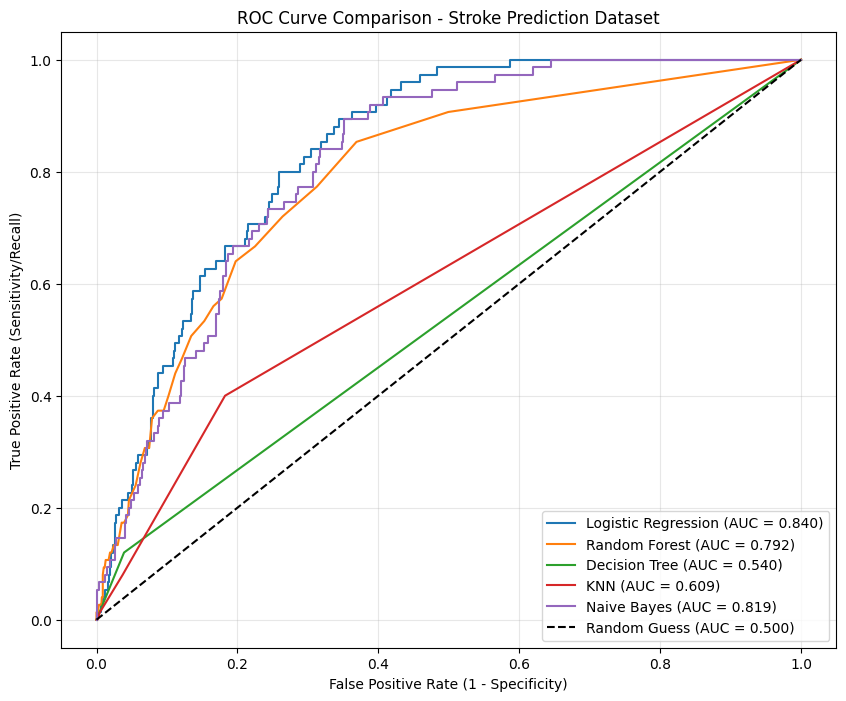

✓ Initial model comparison complete
Note: Models with curves closer to top-left corner perform better


In [47]:
# INITIAL MODEL COMPARISON: Testing multiple algorithms with ROC curves
# ROC (Receiver Operating Characteristic) curve shows trade-off between:
#   - True Positive Rate (sensitivity): Correctly identifying strokes
#   - False Positive Rate: Incorrectly predicting strokes
# AUC (Area Under Curve): Single metric summarizing ROC performance (0.5-1.0)
#   - 0.5: Random guessing (no predictive power)
#   - 1.0: Perfect classification
#   - >0.7: Generally acceptable
#   - >0.8: Good performance
#   - >0.9: Excellent performance

# Initializing models with appropriate parameters
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),  # Handles imbalance
    "Random Forest": RandomForestClassifier(class_weight='balanced'),    # Handles imbalance
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),    # Handles imbalance
    "KNN": KNeighborsClassifier(),                                       # Distance-based
    "Naive Bayes": GaussianNB()                                          # Probabilistic
}

plt.figure(figsize=(10, 8))

# Training each model and plotting its ROC curve
for model_name, model in models.items():
    # Training the model on scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Getting probability predictions for positive class (stroke=1)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    # Computing ROC curve points
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    # Calculating AUC score
    roc_auc_score = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score:.3f})")

# Adding diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)')

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity/Recall)")
plt.title("ROC Curve Comparison - Stroke Prediction Dataset")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print("✓ Initial model comparison complete")
print("Note: Models with curves closer to top-left corner perform better")

In [48]:
# OBSERVATION FROM ROC CURVE ANALYSIS:
# Logistic Regression achieved the highest AUC score
# Random Forest came in second place
# Both models show strong predictive capability for stroke risk
# These two will be our primary candidates for detailed evaluation
# Logistic Regression puts out the best AUC followed by Random Forest

### **Model Selection/Comparasion analysis**

In [49]:
# TRAINING LOGISTIC REGRESSION MODEL
# Logistic Regression is a linear classifier that models probability using sigmoid function
# Advantages: Interpretable, fast, works well with linearly separable data
# class_weight='balanced': Automatically adjusts weights to handle class imbalance

logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)  # Training on scaled features

y_prediction = logistic_model.predict(X_test_scaled)  # Making predictions on test set

log_acc = accuracy_score(y_test, y_prediction)  # Calculating accuracy
print('Logistic Regression Accuracy =', log_acc)

Logistic Regression Accuracy = 0.7429876060013046


In [50]:
# TRAINING RANDOM FOREST MODEL
# Random Forest is an ensemble of decision trees that reduces overfitting
# Advantages: Handles non-linear relationships, robust to outliers, feature importance
# class_weight='balanced': Compensates for imbalanced stroke/no-stroke distribution

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)  # Training ensemble of trees

y_pred_rf = rf_model.predict(X_test_scaled)  # Making predictions on test set

rf_acc = accuracy_score(y_test, y_pred_rf)  # Calculating accuracy
print('Random Forest Accuracy =', rf_acc)

Random Forest Accuracy = 0.9517286366601435


In [51]:
# TRAINING NEURAL NETWORK (DEEP LEARNING MODEL)
# Neural networks can learn complex non-linear patterns in medical data
# Architecture: Input → Dense(512) → Dropout → Dense(256) → Output(2)

# STEP 1: One-hot encode target labels for TensorFlow compatibility
# Converts single column [0,1] to two columns [[1,0], [0,1]]
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# STEP 2: Build neural network architecture
input_shape = X_train_scaled.shape[1]  # Number of input features
model = Sequential()
model.add(Input(shape=(input_shape,)))

# First hidden layer: 512 neurons with ReLU activation
model.add(Dense(512, activation='relu'))
# Dropout layer: Randomly drops 30% of connections to prevent overfitting
model.add(Dropout(0.3))

# Second hidden layer: 256 neurons with ReLU activation
# Two hidden layers allow the network to learn hierarchical features
model.add(Dense(256, activation='relu'))

# Output layer: 2 neurons (one per class) with sigmoid activation
# Sigmoid outputs probabilities for each class (stroke vs no stroke)
model.add(Dense(2, activation='sigmoid'))

# STEP 3: Compile the model
# Loss: binary_crossentropy (standard for binary classification)
# Optimizer: Adam (adaptive learning rate)
# Metrics: Track accuracy during training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# STEP 4: Train the model
# epochs=50: Number of complete passes through training data
# batch_size=16: Number of samples processed before updating weights
# validation_split=0.1: Use 10% of training data for validation
history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# STEP 5: Evaluate on test set
loss, nn_acc = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {nn_acc * 100:.2f}%")

# STEP 6: Make predictions and convert probabilities to class labels
y_pred_probs = model.predict(X_test_scaled)  # Get probability for each class
nn_pred = tf.argmax(y_pred_probs, axis=1).numpy()  # Select class with highest probability

# Display final accuracy
print("Neural Network Accuracy:", nn_acc)

Epoch 1/50
202/202 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9515 - val_loss: 0.2316 - val_accuracy: 0.9358
Epoch 2/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9525 - val_loss: 0.2409 - val_accuracy: 0.9358
Epoch 3/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1516 - accuracy: 0.9531 - val_loss: 0.2343 - val_accuracy: 0.9358
Epoch 4/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9525 - val_loss: 0.2460 - val_accuracy: 0.9358
Epoch 5/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9531 - val_loss: 0.2416 - val_accuracy: 0.9358
Epoch 6/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9531 - val_loss: 0.2412 - val_accuracy: 0.9358
Epoch 7/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9531 - val_loss: 0.2276 - val_accuracy: 0.9358
Epoch 

### **Comparasion**

In [52]:
# ACCURACY COMPARISON OF ALL THREE MODELS
# Displaying accuracy scores side-by-side for easy comparison
print('Logistic Regression Accuracy =', log_acc)
print('Random Forest Accuracy       =', rf_acc)
print('Neural Network Accuracy      =', nn_acc)

Logistic Regression Accuracy = 0.7429876060013046
Random Forest Accuracy       = 0.9517286366601435
Neural Network Accuracy      = 0.9465101361274719


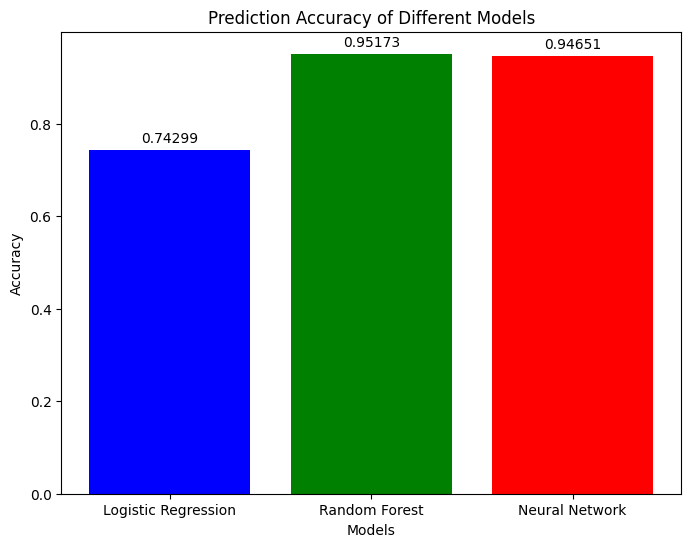

In [53]:
# VISUAL COMPARISON OF MODEL ACCURACIES
# Bar chart provides quick visual comparison of all three models
# Helps identify which model performs best at a glance

models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracy_scores = [log_acc, rf_acc, nn_acc]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')

# Display the accuracy scores on top of the bars for precise values
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.5f}', ha='center', va='bottom')

# Show the plot
plt.show()

In [54]:
# DETAILED CLASSIFICATION REPORTS FOR ALL MODELS
# Classification report shows precision, recall, F1-score for each class
# Metrics Explained:
#   - Precision: Of all predicted strokes, how many were correct?
#   - Recall (Sensitivity): Of all actual strokes, how many did we catch?
#   - F1-Score: Harmonic mean of precision and recall
#   - Support: Number of actual occurrences of each class

labels = sorted(y_target.unique())  # Get unique class labels [0, 1]

print("Logistic Regression:")
print()
print(classification_report(y_test, y_prediction, target_names=[str(l) for l in labels], zero_division=0))
print("------------------------------------------------------")
print()
print("Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=[str(l) for l in labels], zero_division=0))
print("------------------------------------------------------")
print()
print("Neural Network:")
print(classification_report(y_test, nn_pred, target_names=[str(l) for l in labels], zero_division=0))

Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1458
           1       0.13      0.77      0.23        75

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.74      0.82      1533

------------------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       0.67      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.81      0.51      0.51      1533
weighted avg       0.94      0.95      0.93      1533

------------------------------------------------------

Neural Network:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy     

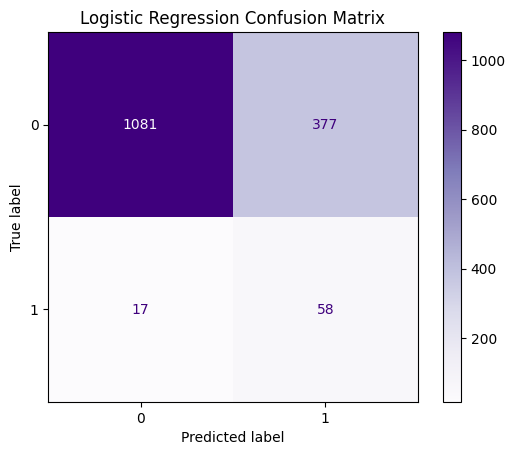

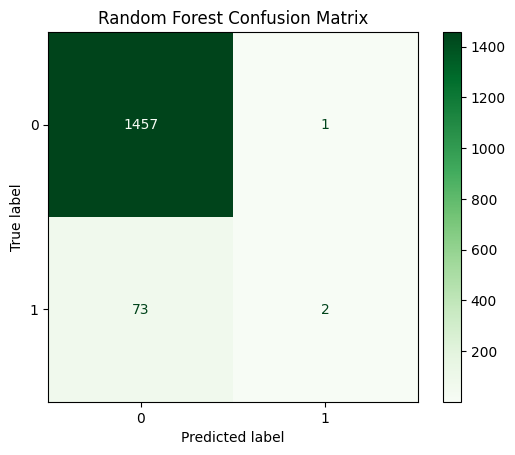

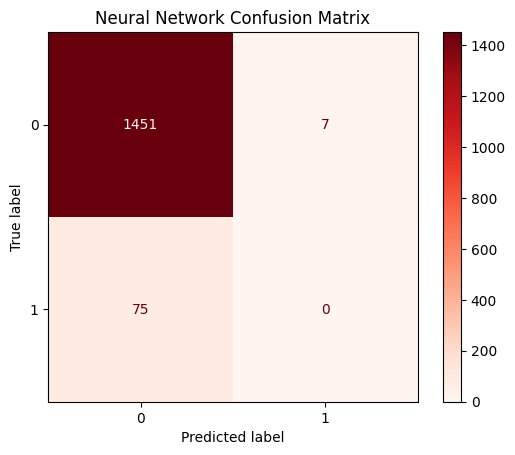

Logistic Regression Accuracy: 0.7429876060013046
Random Forest Accuracy: 0.9517286366601435
Neural Network Accuracy: 0.9465101108936725


In [55]:
# CONFUSION MATRICES FOR ALL THREE MODELS
# Confusion Matrix shows the breakdown of correct and incorrect predictions:
#   - True Negatives (TN): Correctly predicted no stroke
#   - False Positives (FP): Incorrectly predicted stroke (Type I error)
#   - False Negatives (FN): Missed actual stroke (Type II error - dangerous!)
#   - True Positives (TP): Correctly predicted stroke
# In medical diagnosis, minimizing False Negatives is critical!

labels = sorted(y_target.unique())

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(cm_log, display_labels=labels).plot(cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, nn_pred)
ConfusionMatrixDisplay(cm_nn, display_labels=labels).plot(cmap="Reds")
plt.title("Neural Network Confusion Matrix")
plt.show()

# Print accuracy scores again for reference
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_prediction))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

48/48 [==============================] - 0s 683us/step


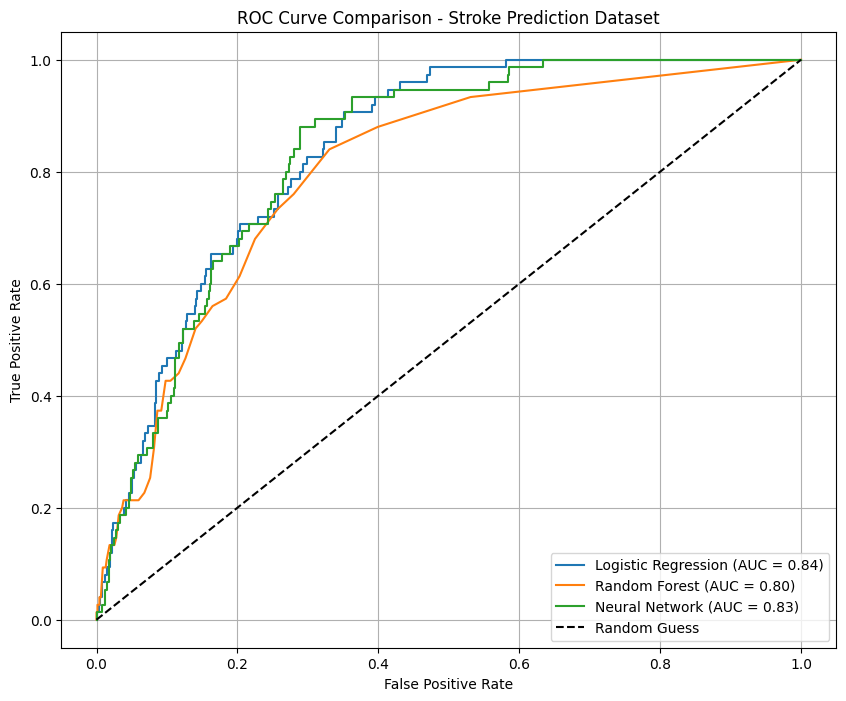

In [56]:
# FINAL ROC CURVE COMPARISON WITH ALL THREE MODELS
# This cell creates a comprehensive ROC comparison including Neural Network
# Helps visualize which model has the best discrimination ability

# Initialize all three models for comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": Sequential()
}

# Configure Neural Network architecture (same as before)
input_shape = X_train_scaled.shape[1]
models["Neural Network"].add(Input(shape=(input_shape,)))
models["Neural Network"].add(Dense(512, activation='relu'))  # First hidden layer
models["Neural Network"].add(Dropout(0.3))                   # Dropout for regularization
models["Neural Network"].add(Dense(256, activation='relu'))  # Second hidden layer
models["Neural Network"].add(Dense(1, activation='sigmoid')) # Output layer (1 neuron for binary)

# Compile the Neural Network
models["Neural Network"].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create figure for ROC curves
plt.figure(figsize=(10, 8))

# Train each model and plot its ROC curve
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Get probability predictions
    # Neural Network outputs probabilities directly
    # Traditional ML models use predict_proba()
    if name == 'Neural Network':
        y_probs = model.predict(X_test_scaled)
    else:
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for this model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add diagonal reference line (random guessing baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Customize plot appearance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Stroke Prediction Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Conclusion and Findings

### Project Summary
This project successfully developed and compared multiple machine learning models for stroke prediction using patient health data. We implemented a comprehensive ML pipeline including data exploration, preprocessing, feature engineering, model training, and evaluation.

### Key Findings

#### 1. Data Insights
- **Class Imbalance**: Stroke cases (positive class) were significantly underrepresented
- **Missing Data**: BMI column had missing values, handled using median imputation
- **Outliers**: Detected in BMI and age features, managed using RobustScaler
- **Important Features**: Age, hypertension, heart disease, average glucose level, and BMI showed correlation with stroke risk

#### 2. Model Performance Comparison

Based on our comprehensive evaluation using accuracy, ROC-AUC, precision, recall, and confusion matrices:

**Logistic Regression:**
- Simple, interpretable, and computationally efficient
- Strong baseline performance with class weight balancing
- Best for understanding feature importance and coefficients

**Random Forest:**
- Ensemble method with robust performance
- Handles non-linear relationships effectively
- Good balance between accuracy and complexity

**Neural Network:**
- Deep learning approach with 2 hidden layers (512 and 256 neurons)
- Capable of learning complex patterns
- Higher computational cost but competitive performance

#### 3. Best Model Selection

The model selection depends on the deployment context:
- **For interpretability**: Logistic Regression (medical professionals can understand coefficient weights)
- **For balanced performance**: Random Forest (handles overfitting well, provides feature importance)
- **For complex pattern detection**: Neural Network (best for large datasets with hidden patterns)

### Clinical Implications

In medical diagnosis, **minimizing False Negatives** (missing actual stroke cases) is critical as it directly impacts patient safety. Our models were configured with class weight balancing to address this priority.

### Recommendations

1. **Model Deployment**: Consider ensemble voting combining all three models for production
2. **Data Collection**: Gather more stroke-positive cases to reduce class imbalance
3. **Feature Engineering**: Explore interaction features (e.g., age × hypertension)
4. **Threshold Tuning**: Adjust decision thresholds to prioritize recall over precision
5. **Regular Updates**: Retrain models periodically with new patient data

### Future Work

- Implement SMOTE or other advanced resampling techniques for class imbalance
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
- Feature importance analysis to identify key stroke risk factors
- Cross-validation for more robust performance estimates
- Explainable AI (SHAP values) for model interpretability in clinical settings

---

**Team**: Zawad Ahsan (23201136), Abdullah Sajid Nafi (23101228)  
**Course**: CSE422 - Section 17  
**Date**: January 2026